# Part I - (Ford GoBike System Data)
## by (John Kwame Dunyo)

## Introduction

#### Dataset Overview
The dataset used in this project is from the Ford GoBike Systems. It includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

#### Investigation Overview
The Goal of this presentation is to explore the main features of bike-sharing system of the greater San Francisco Bay area.  It seeks to try to answer the following questions:
1. When are most trips taken in terms of time of day, day of the week, or month of the year?
2. How long does the average trip take?
3. What does the distribution of trip duration look like?
4. Which days have the highest demand on trips?
5. Which hours during the day have the highest demand on trips?
6. How trip duration differs by user age, hour, day, and user type?
7. Does the above depend on if a user is a subscriber or customer?




## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# # load in the dataset into a pandas dataframe, and print statistics
df = pd.read_csv("./201902-fordgobike-tripdata.csv")

In [4]:
# high-level overview of data shape, null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# descriptive statistics for numeric variables
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# cheching duplicated row
df.duplicated().sum()

0

In [8]:
# checking number of null values in each column
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

## Preliminary Cleaning

### Challenges associated with the dataset

The following are some quality issues of the dataset that needs to be cleaned

* Missing values issues in the following columns; <code>start_station_id</code>, <code>start_station_name</code>, <code>end_station_id</code>, <code>end_station_name</code>, <code>member_birth_year</code>, <code>member_gender</code>.

* Data type issues;
 > 1. <code>start_time</code> and <code>end_time</code> need to be of type datetime not object.
 > 2. <code>start_station_id</code>, <code>end_station_id</code>, and <code>bike_id</code> should be of type string object
 > 3. <code>user_type</code>, <code>member_gender</code>, and <code>bike_share_for_all_trip</code> should be of type category
* Extract age from <code>member_gender</code> for easier analysis
* Add new columns for trip duration in minute, start_date, start hour of the day, start day of week and start month
 


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### fixing the issues above

In [15]:
# Drop missing values 
df.dropna(inplace=True)

In [16]:
# convert start_time and end_time into datetime 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# convert member_birth_year to type int
df.member_birth_year = df.member_birth_year.astype('int')

#changing dtype of id columns to type string object
for col in ['start_station_id', 'end_station_id', 'bike_id']:
    df[col] = df[col].astype('str')
    
# change dtype of user_type, member_gender & bike_share... to type category
for col in ['user_type', 'member_gender', 'bike_share_for_all_trip']:
    df[col] = df[col].astype('category')

In [17]:
df['member_age'] = (2022-df['member_birth_year']).astype('int')

In [18]:
# add new columns for trip duration in minute, start_date, start hour of the day, start day of week and start month
df['duration_minute'] = df['duration_sec']/60
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

In [19]:
df.head

<bound method NDFrame.head of         duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5               1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
...              ...                     ...                     ...   
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

       start_station_id                                start_station_name  \
0                  21.0  Mon

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [34]:
df.to_csv('201902-fordgobike-tripdata_CLEANED.csv')

### What is the structure of your dataset?

> The data set originally had 183412 rows with 16 attributes. After preliminary cleaning, the final dataset now has 174953 rows and 22 features. 3 features are categorical, 2 are datetime and the rest numerical with 9 beign object. 



### What is/are the main feature(s) of interest in your dataset?

> * duration_sec, number of trips

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>* member_birth_year
*member_age
*member_gender
*bike_share_for_all_trip
*start_month
*start_dayofweek
*user_type

## Univariate Exploration

> In this section, we investigate distributions of individual variables. If
we see unusual points or outliers, take a deeper look to clean things up
and prepare ourself to look at relationships between variables.



###  What is the daily usage distribution like?

In [27]:
# Daily bike trip distribution of the Ford Go bike system
color = sb.color_palette()[0]
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plot = sb.catplot(data=df, x='start_dayofweek', kind='count', color = sb.color_palette()[0], order=order)
plot.set_axis_labels('Weekdays', 'Number of Bike Rides')
plot.fig.suptitle('Daily Ride Dristribution', y=1.05, fontsize=16, fontweight='bold');
plot.set_xticklabels(rotation=75);

__Observation:__ The demand for trips gradually increases untill reaching its highest levels on Thursday, it then declines untill reaching its lowest levels on Saturday and Sunday. This suggests that most of the rides are used to transit to and from work/school.


### How does the distribution varry on hourly basis?

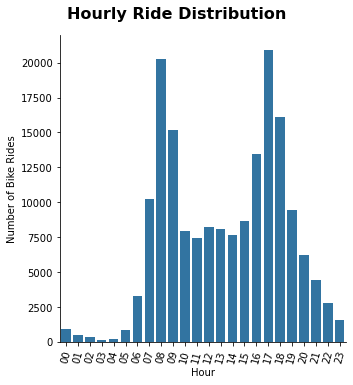

In [122]:
order=[str(i) if i> 9 else '0'+str(i) for i in range(0,24)]
plot = sb.catplot(data=df, x='start_hourofday', kind='count', color = sb.color_palette()[0], order=order)
plot.set_axis_labels('Hour', 'Number of Bike Rides')
plot.fig.suptitle('Hourly Ride Distribution', y=1.05, fontsize=16, fontweight='bold');
plot.set_xticklabels(rotation=75);

__Observation:__ The distribution is bimodal, with peaks at 8:00 am and 5:00pm. This further confirms that proposition  that most of the rides are used to transit to and from work/school.

### What gender frequents the Ford GoBike system?


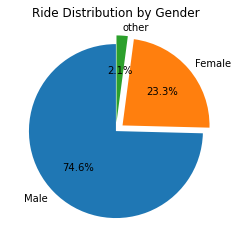

In [28]:
gender_cnt = df['member_gender'].value_counts()

plt.pie(gender_cnt, labels = ['Male','Female','other'], autopct='%1.1f%%', startangle = 90,explode =(0 , 0.1, 0.1));
plt.title('Ride Distribution by Gender');

__Observation:__ Males frequent the Ford GoBike systems 3 times compared to their female counterparts

### What is the distrubition like accross the various user types?

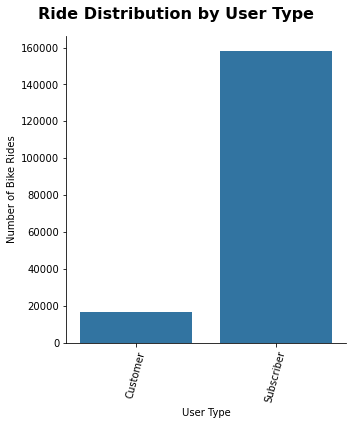

In [29]:
plot = sb.catplot(data=df, x='user_type', kind='count', color = sb.color_palette()[0])
plot.set_axis_labels('User Type', 'Number of Bike Rides')
plot.fig.suptitle('Ride Distribution by User Type', y=1.05, fontsize=16, fontweight='bold');
plot.set_xticklabels(rotation=75);

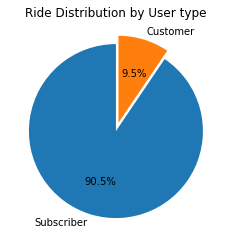

In [30]:
user_type = df['user_type'].value_counts()
plt.pie(user_type, labels = ['Subscriber','Customer',], autopct='%1.1f%%', startangle = 90,explode =(0 , 0.1));
plt.title('Ride Distribution by User type');

__Observation:__ Subscribers patronise the system more than the customers

### How does the distribution vary accross the ages of the members?

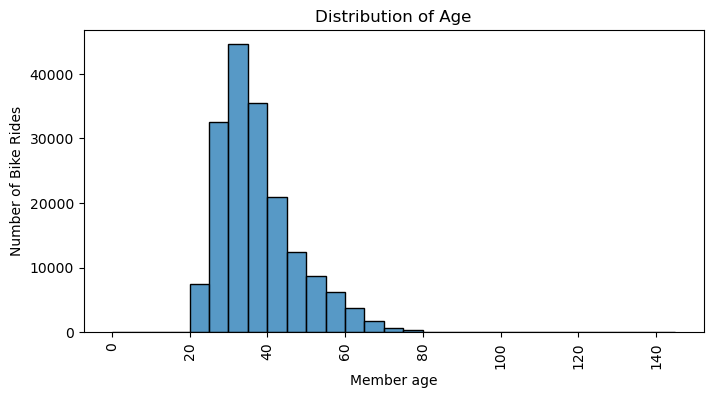

In [149]:
# Distribution of Age
plt.figure(figsize = (8,4), dpi = 100)

bins = np.arange(0, df['member_age'].max()+5, 5)
sb.histplot(data=df, x='member_age', color=sb.color_palette()[0], bins = bins)
plt.xticks(rotation=90)
plt.xlabel('Member age')
plt.ylabel('Number of Bike Rides')

plt.title("Distribution of Age")

plt.show();

__Observation:__ The distribution is skewed to the right. People withing ages 25 and 45 usually use the Ford GoBike system.

### How does the Ride duration affect the distribution?

(30.0, 40000.0)

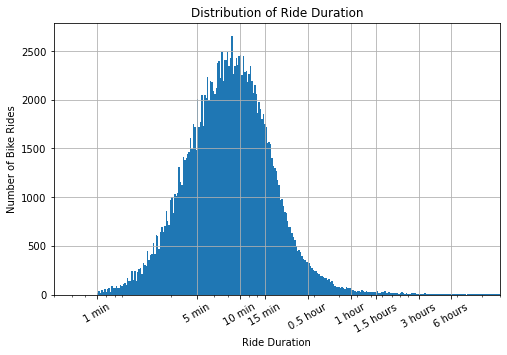

In [154]:
plt.figure(figsize=(8,5))
bins=10**np.arange(1.5,5,.01)
df.duration_sec.hist(bins=bins)
plt.xscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.xticks(tick_locs, tick_names,rotation=30);
plt.xlabel('Ride Duration')
plt.ylabel('Number of Bike Rides')
plt.title('Distribution of Ride Duration');
plt.xlim(30,40000)

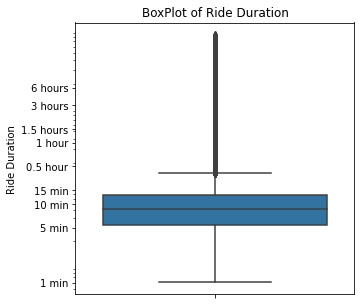

In [155]:
plt.figure(figsize=(5,5))
sb.boxplot( y=df['duration_sec'])
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.ylabel('Ride Duration')
plt.title('BoxPlot of Ride Duration');
plt.yticks(tick_locs, tick_names);

__Observation__ Most of the rides range between 5 and 15 minutes, with a mean of about 10 minutes. This has been further confirmed by the box plot

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The ride duration exhibts a normal distribution with most of the rides having a duration between 5 and 15 minutes. Most of the rides take place during weekdays with a daily bimodal distribution with peaks at 8:00 AM and 5:00 PM, mosly on weekdays. This suggests the the rides are used mainly to go to and from work/school.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The other variables have a normal distribution.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### What is the relation between weekday and number of bike rides depending on user type?

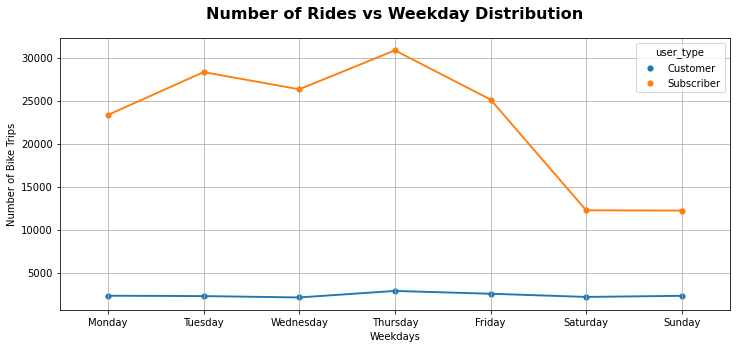

In [163]:
plt.figure(figsize=(12, 5))

df_user_week = df.groupby(['start_dayofweek', 'user_type']).size().reset_index()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.pointplot(data=df_user_week, x='start_dayofweek', y=0, hue = 'user_type', scale=.7, order = order);

plt.title('Number of Rides vs Weekday Distribution', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Rides');
plt.grid();

__Observation:__ Subcribers have a relatively high usage of the bike share system with a sharp decrease on the weekends. Customers on the other hand exhibit an opposite relationship to that of subcribers

### How does ride duration vary accross the different member gender?

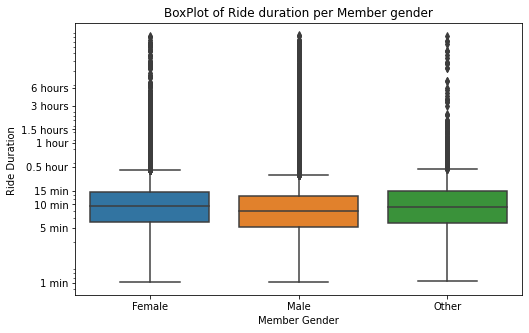

In [201]:
plt.figure(figsize=(8,5))
sb.boxplot(x=df['member_gender'], y=df['duration_sec'])
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.title('BoxPlot of Ride duration per Member gender')
plt.ylabel('Ride Duration ')
plt.xlabel('Member Gender')
plt.yticks(tick_locs, tick_names);

__Observation__ Females tend to have a slightly higher average time ride compared to male and the other gender

### What is the relationship between Ride duration and User type

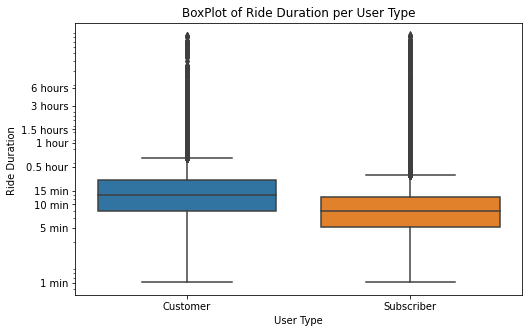

In [200]:
plt.figure(figsize=(8,5))
sb.boxplot(x=df['user_type'], y=df['duration_sec'])
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.title('BoxPlot of Ride Duration per User Type')
plt.ylabel('Ride Duration ')
plt.xlabel('User Type')
plt.yticks(tick_locs, tick_names);

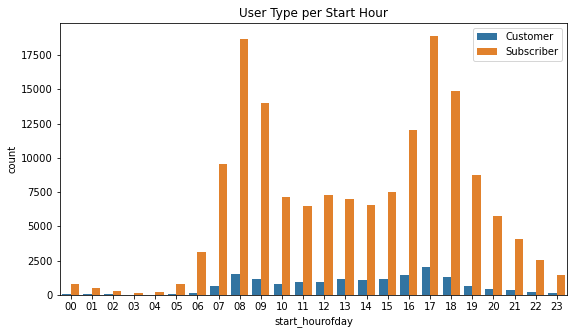

In [36]:
# clustered bar chart, 
order=[str(i) if i> 9 else '0'+str(i) for i in range(0,24)]
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'start_hourofday', hue = 'user_type', order=order)
plt.legend();
plt.title('User Type per Start Hour');

__Observation__ From the box plot above, subscribers tend to have less average ride times compared to normal customers. This may mean that most of the subscribers are using the system to comute to and from work/school, with the same round trip time everyday.

### Average Trip Duration vs Day of the week

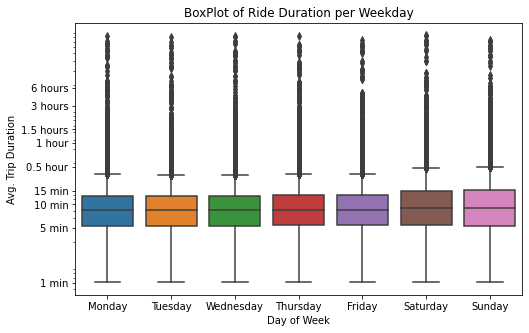

In [209]:
plt.figure(figsize=(8,5))
plt.title('BoxPlot of Ride Duration per Weekday')
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.boxplot(data = df, x = "start_dayofweek", y = "duration_sec", order=order)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration')
plt.yticks(tick_locs, tick_names)
plt.show();

__Observation:__ The box plot reflects a stable use along weekdays. Trip duration is longer during weekends, reflecting more casual usages.

### How does the trip duration vary with member age?

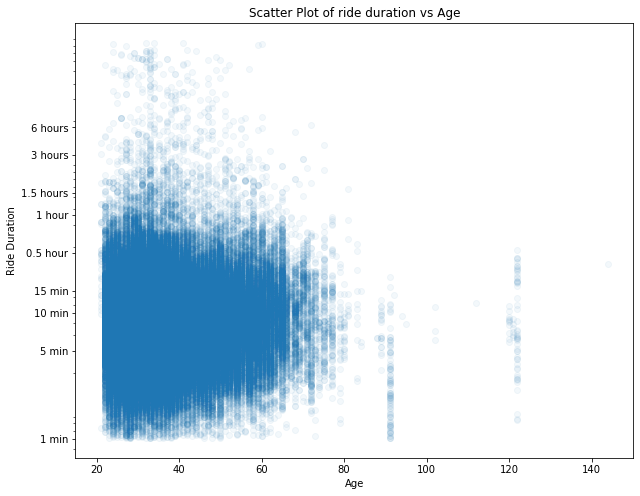

In [222]:
plt.figure(figsize=(10,8))
plt.scatter(data=df ,x='age', y='duration_sec',alpha=1/20)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.yticks(tick_locs, tick_names)
plt.xlabel('Age')
plt.ylabel('Ride Duration')
plt.title('Scatter Plot of ride duration vs Age');

__Observation:__ It looks as if the variance in duration in most of the rides is getting smaller with age uptill 65 years. There are not much rides above that age to consider for a behaviour 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are a lot more subscriber usage than customers. Subscribers usage seem to be very consistent and standard, their usage is intended for daily routine such as work or study. whereas customers, on the other hand, tend to ride for fun in the afternoon or early evenings over weekends, with higher average rides. This may be for recreational and entertainment purposes

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, some of interesting how customers ride are mostly in the evenings

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Customers vs Subcribers usage per weekday

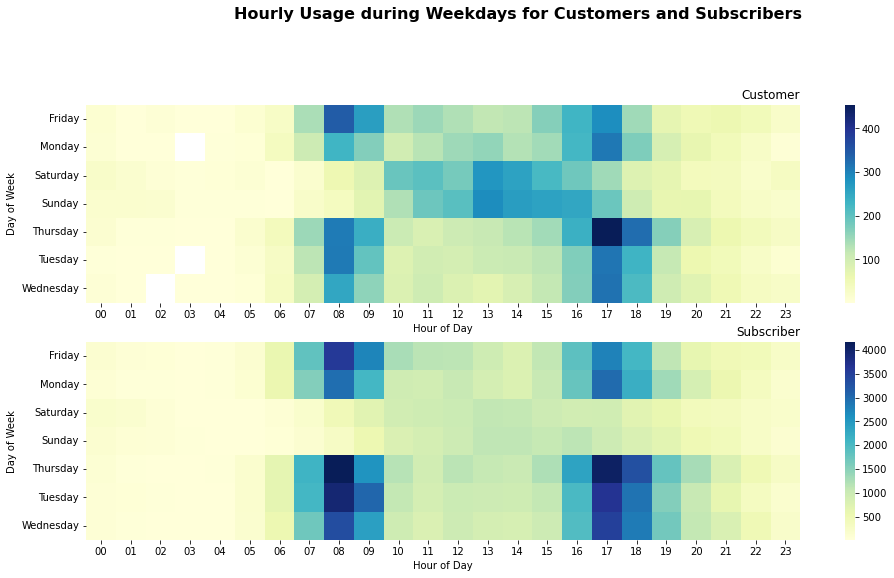

In [231]:
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', y=1.05, fontsize=16, fontweight='bold');

plt.subplot(2, 1, 2);
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

__Observation:__ The plot above further confirms the earlier relationships establised. Subcribers tend to have a stable usega pattern, ie weekdays (Mondays to Fridays) at 07:00AM tp 9:00Am and at 4:00PM to 6:00PM.

### Relation between Ride duration, Age and Gender

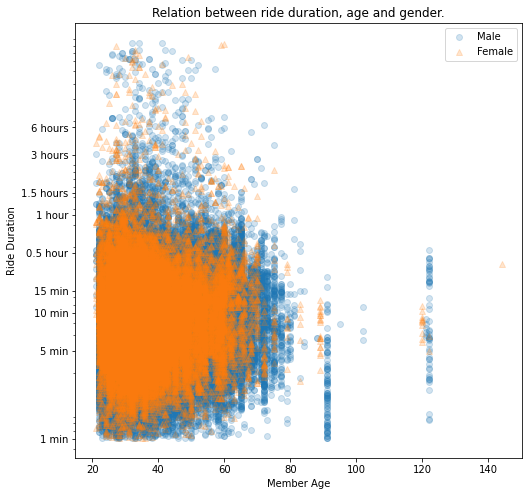

In [244]:
plt.figure(figsize=(8,8))
ttype_markers=[['Male','o'],['Female','^']]
plt.title('Relation between ride duration, age and gender.')
for ttype,marker in ttype_markers:
    plot_data=df.loc[df['member_gender']==ttype]
    sb.regplot(data=plot_data,x='age',y='duration_sec',fit_reg=False,marker=marker,scatter_kws={'alpha':1/5})
    plt.yscale('log')
    tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
    tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
    plt.yticks(tick_locs, tick_names)
plt.ylabel('Ride Duration')
plt.xlabel('Member Age')
plt.legend(['Male','Female']);


__Observation:__ there exists a less variance in the ride duration with age for females than for males

### Trip duration over day hours and by customer type

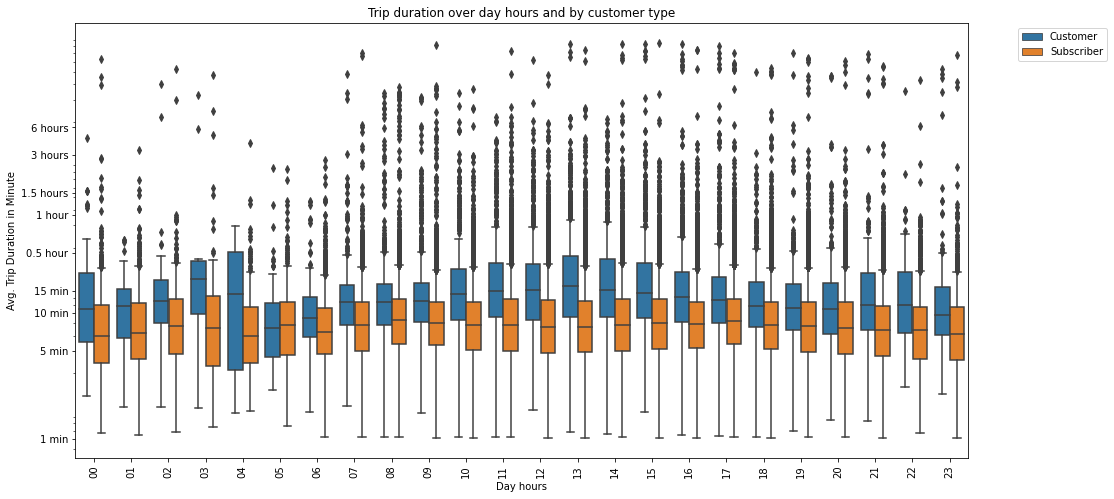

In [245]:
plt.figure(figsize = (16,8));
order=[str(i) if i> 9 else '0'+str(i) for i in range(0,24)]
sb.boxplot(data = df, x = "start_hourofday", y = "duration_sec", hue='user_type', order=order)
plt.yscale('log')
tick_locs = [60,300,600,900,1800,3600,5400,10800,18000]
tick_names=['1 min','5 min','10 min','15 min','0.5 hour','1 hour','1.5 hours','3 hours','6 hours']
plt.yticks(tick_locs, tick_names);
plt.title("Trip duration over day hours and by customer type")
plt.xlabel('Day hours')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()




__Observation:__ Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers have consistently longer trips than subscribers, and this occurs across all hours of the day. However, most customer trips are much longer at midnight and midday.

### Were there any interesting or surprising interactions between features?

> None

## Conclusions
> There are two types of clients using the Ford GoBike system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work/school, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.
